# Keras Prediction
4 2D CNN Convolutional Layer
---

Credits:
- https://www.kaggle.com/ejlok1/audio-emotion-part-6-2d-cnn-66-accuracy

In [1]:
# Credit to:
# https://www.kaggle.com/ejlok1/audio-emotion-part-6-2d-cnn-66-accuracy

# Keras
from keras.utils import np_utils, to_categorical

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import numpy as np
import pandas as pd
import os

# Local
from source_pytorch.kerasLoader import KerasLoader
from source_pytorch.kerasCnnModel import KerasCnnModel
from source_pytorch.kerasResultTools import Get_results

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [1]:
#Get the reference
ref = pd.read_csv("./ReferenceData.csv")#[:100]
#Print head / test successfull load
ref.head()

NameError: name 'pd' is not defined

In [14]:
#Set the parameters and load the data
audio_duration=4
n_mfcc = 40
mfcc = KerasLoader().prepare_data(ref,n_mfcc,44100, 4 )

100%|██████████| 1440/1440 [01:04<00:00, 22.22it/s]


In [15]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(mfcc
                                                    , ref.label.tolist()
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )


# One hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [16]:
%%time

# Build CNN model 
model = KerasCnnModel().load(n=n_mfcc)

#Fit and Valid the data
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=16, verbose = 2, epochs=20)

Train on 1080 samples, validate on 360 samples
Epoch 1/20
 - 93s - loss: 2.0514 - acc: 0.2259 - val_loss: 1.8866 - val_acc: 0.2889
Epoch 2/20
 - 94s - loss: 1.9279 - acc: 0.2287 - val_loss: 1.8638 - val_acc: 0.2389
Epoch 3/20
 - 93s - loss: 1.8601 - acc: 0.2889 - val_loss: 1.8667 - val_acc: 0.2694
Epoch 4/20
 - 93s - loss: 1.8680 - acc: 0.2574 - val_loss: 1.8075 - val_acc: 0.2611
Epoch 5/20
 - 90s - loss: 1.9000 - acc: 0.2444 - val_loss: 1.7835 - val_acc: 0.2889
Epoch 6/20
 - 90s - loss: 1.8452 - acc: 0.2694 - val_loss: 1.7660 - val_acc: 0.2722
Epoch 7/20
 - 87s - loss: 1.8156 - acc: 0.2833 - val_loss: 1.7682 - val_acc: 0.2889
Epoch 8/20
 - 87s - loss: 1.8125 - acc: 0.2870 - val_loss: 1.8015 - val_acc: 0.3056
Epoch 9/20
 - 87s - loss: 1.8388 - acc: 0.2741 - val_loss: 1.7479 - val_acc: 0.3111
Epoch 10/20
 - 87s - loss: 1.7806 - acc: 0.2778 - val_loss: 1.7441 - val_acc: 0.3194
Epoch 11/20
 - 86s - loss: 1.7645 - acc: 0.3093 - val_loss: 1.9083 - val_acc: 0.2806
Epoch 12/20
 - 87s - loss: 

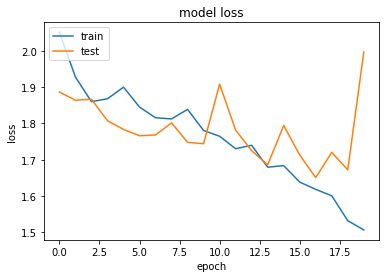

acc: 23.61%


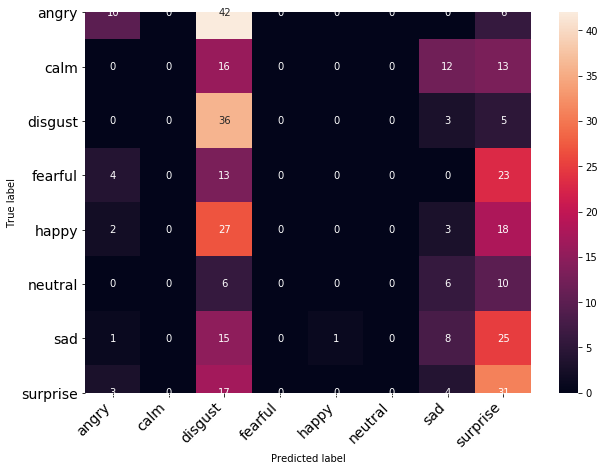

In [17]:
#Show the result
results = Get_results(model_history,model,X_test,y_test, ref.label.unique())
results.create_plot(model_history)
results.create_results(model,X_test, y_test)
results.confusion_results(X_test, y_test, ref.label.unique(), model,lb)